In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [2]:
g=pd.read_csv('matrix_count_dropmsno_sort',sep='\t')
g

,msno,song_id,song_count,msno_count
0,33851796,2251669,7200.0,141
1,22938333,1178843,7034.0,157
2,133000945,2251710,5314.0,129
3,15665099,2251669,4260.0,142
4,10047535,3700574,4219.0,125
5,122061103,2251669,3980.0,158
6,124571003,3700574,3730.0,191
7,68655140,126049475,3667.0,278
8,22462609,1178843,3345.0,338
9,3880042,2251710,3061.0,162


In [3]:
k=g.pivot(index='msno',columns='song_id',values='song_count')
k=k.fillna(value=0)
del(g)
e=k.iloc[:1000,:]

In [4]:
r=np.array(k)
r

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  4.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

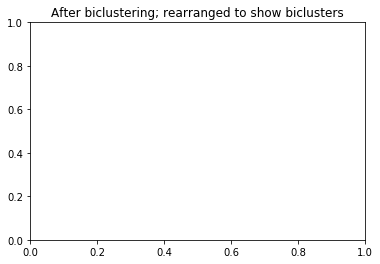

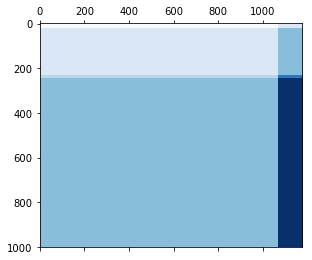

consensus score: 0.2


In [5]:
n_clusters = (4,2)
#data, row_idx, col_idx = sg._shuffle(r[:400,:], random_state=0)
model = SpectralBiclustering(n_clusters=n_clusters, method='log',random_state=0)
model.fit(r[:1000,:])
#fit_data = data[np.argsort(model.row_labels_)]
#fit_data = fit_data[:, np.argsort(model.column_labels_)]
#plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
#plt.title("Checkerboard structure of rearranged data")
#plt.show()
score = consensus_score(model.biclusters_,(model.rows_[:, model.row_labels_], 
                                           model.columns_[:, model.column_labels_]))
plt.show()
#matrix_dic[str(rows)+','+str(columns)]='{:.2f}'.format(score)
#print(str(rows)+','+str(columns)+":"+'{:.2f}'.format(score))
print("consensus score: {:.1f}".format(score))


In [6]:
pd.DataFrame(model.rows_)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [7]:
pd.DataFrame(model.columns_)

,0,1,2,3,4,5,6,7,8,9,...,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
row_dt=pd.DataFrame(model.row_labels_)[pd.DataFrame(model.row_labels_)[0]==2]
row_dt
col_dt=pd.DataFrame(model.column_labels_)[pd.DataFrame(model.column_labels_)[0]==1]

In [9]:
col_dt

,0
69,1
179,1
200,1
249,1
266,1
267,1
268,1
288,1
289,1
292,1


In [10]:
#群結果
#clu_ro=vr[vr['First'].values==True]
#clu_col=vc[vc['First'].values==True]

dataset2=pd.DataFrame(columns=e.columns)
for w in row_dt.index:
    dataset2=dataset2.append(e.iloc[w,:])
    
dataset3=dataset2
for qq in range(0,1175):
    dataset3=dataset3.drop(dataset3.columns[0],axis=1)

dataset4=dataset2
for ww in col_dt.index:
    #d3=d3.drop(d3.columns[ww],axis=1)
    #d3=d3.drop(d3.columns[ww],axis=1)
    dataset3=dataset3.join(dataset4.iloc[:,ww])
dataset3


,943980,1624179,1838131,2136572,2235036,2235039,2235040,2322159,2322169,2357680,...,215085152,215345521,215769101,215994207,216131850,216161006,216338691,217197766,217197773,217284445
19287,10.0,14.0,12.0,12.0,14.0,12.0,10.0,15.0,12.0,11.0,...,3.0,6.0,8.0,10.0,0.0,18.0,6.0,0.0,0.0,0.0
38674,10.0,15.0,10.0,10.0,12.0,10.0,10.0,13.0,10.0,10.0,...,15.0,31.0,15.0,31.0,0.0,19.0,15.0,0.0,0.0,0.0
80927,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,0.0,3.0,2.0,0.0,0.0,0.0
85852,13.0,20.0,21.0,16.0,25.0,12.0,8.0,21.0,22.0,18.0,...,4.0,11.0,12.0,3.0,8.0,19.0,10.0,9.0,2.0,9.0
101830,5.0,6.0,5.0,6.0,5.0,6.0,8.0,5.0,5.0,5.0,...,1.0,3.0,1.0,2.0,11.0,4.0,2.0,23.0,1.0,1.0
128300,18.0,16.0,17.0,17.0,20.0,17.0,17.0,20.0,15.0,17.0,...,3.0,9.0,7.0,9.0,0.0,10.0,8.0,12.0,12.0,0.0
130195,10.0,8.0,9.0,8.0,9.0,5.0,5.0,10.0,7.0,10.0,...,5.0,4.0,6.0,3.0,1.0,5.0,5.0,0.0,0.0,1.0
150229,0.0,84.0,1.0,1.0,85.0,0.0,1.0,1.0,82.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152237,4.0,10.0,5.0,5.0,15.0,5.0,4.0,9.0,5.0,4.0,...,3.0,3.0,3.0,4.0,0.0,14.0,2.0,0.0,0.0,0.0
188248,10.0,8.0,5.0,14.0,5.0,5.0,3.0,10.0,8.0,9.0,...,1.0,2.0,2.0,3.0,1.0,3.0,3.0,0.0,0.0,1.0


In [11]:
#v=pd.DataFrame(model.rows_,index=['First','Second','Third','Forth','Fifth','sixth'],columns=[x[0] for x in a])
vr=pd.DataFrame(model.rows_)
vr=vr.transpose()
vr.columns=['First','Second','Third','Forth','Fifth','Sixth','Seventh','Eigth']
vr

,First,Second,Third,Forth,Fifth,Sixth,Seventh,Eigth
0,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,True,True
5,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,True,True
7,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,True,True
9,False,False,False,False,False,False,True,True


In [12]:
vc=pd.DataFrame(model.columns_)
vc=vc.transpose()
vc.columns=['First','Second','Third','Forth','Fifth','Sixth','Seventh','Eigth']
vc

,First,Second,Third,Forth,Fifth,Sixth,Seventh,Eigth
0,True,False,True,False,True,False,True,False
1,True,False,True,False,True,False,True,False
2,True,False,True,False,True,False,True,False
3,True,False,True,False,True,False,True,False
4,True,False,True,False,True,False,True,False
5,True,False,True,False,True,False,True,False
6,True,False,True,False,True,False,True,False
7,True,False,True,False,True,False,True,False
8,True,False,True,False,True,False,True,False
9,True,False,True,False,True,False,True,False


In [13]:
#第二群
clu_ro2=vr[vr['Eigth'].values==True]
clu_col2=vc[vc['Seventh'].values==True]

dataset22=pd.DataFrame(columns=e.columns)
for w in clu_ro2.index:
    dataset22=dataset22.append(e.iloc[w,:])
    
dataset33=dataset22
for qq in range(0,1175):
    dataset33=dataset33.drop(dataset33.columns[0],axis=1)

dataset44=dataset22
for ww in clu_col2.index:
    #d3=d3.drop(d3.columns[ww],axis=1)
    #d3=d3.drop(d3.columns[ww],axis=1)
    dataset33=dataset33.join(dataset44.iloc[:,ww])
dataset33

,568874,585049,585562,585564,622523,622980,622984,623044,678385,678387,...,219126115,219400834,219463266,219595865,219599792,219605035,219605042,219630534,219631146,219842881
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1574,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2586,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
new=pd.concat([pd.DataFrame(dataset3.index),pd.DataFrame(dataset3.columns)],axis=1)
#new=new.rename(columns={0:'msno'})
new.columns=['msno','song']
#new=new.astype(str)
new

,msno,song
0,19287.0,943980
1,38674.0,1624179
2,80927.0,1838131
3,85852.0,2136572
4,101830.0,2235036
5,128300.0,2235039
6,130195.0,2235040
7,150229.0,2322159
8,152237.0,2322169
9,188248.0,2357680
